In [232]:
using Pkg
Pkg.activate("..")

  Activating project at `~/repos/ProactiveHRI.jl`


In [399]:
include("dynamics.jl")
include("planner_utils.jl")
include("utils.jl")
include("planner.jl")
include("plotting.jl")

animation (generic function with 5 methods)

  0.021903 seconds (83.77 k allocations: 6.984 MiB, 17.41% compilation time)


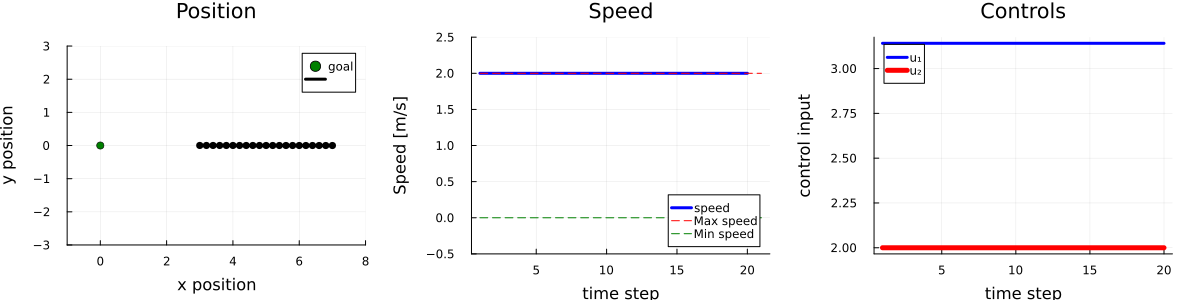

In [234]:
dt = 0.1
velocity_max = 2.0
human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 2.])

time_horizon = 20
Q = zeros(Float64, human.state_dim, human.state_dim)
R = diagm([0.; 0.2]) 
Qt = diagm([10.; 10.])
markup = 1.
collision_slack = 30.
trust_region_weight = 1.
inconvenience_weights = [1.; 1.; 0.05]
collision_radius = 0.25
inconvenience_ratio = 0.1


hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

opt_params = PlannerOptimizerParams(human, hps, [7.;0.], [0.;0.],"ECOS")
opt_params.goal_state = [0.; 0.]
problem = IdealProblem(human, hps, opt_params)
problem, xs, us = @time solve(problem, iterations=4, verbose=false, keep_history=true);
human_states = xs[end]
plot_solve_solution(problem)

In [235]:
dt = 0.1
velocity_max = 2.0
# human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 3.])
robot = Unicycle(dt, velocity_max, [1.0, 2.])
# robot = DoubleIntegrator2D(dt, velocity_max, [1.0, 1.0])

time_horizon = 20
Q = diagm([0.0; 0.0; 0.])
R = diagm([0.5; 0.1]) 
Qt = diagm([3.; 3.; 0.])
markup = 1.0
collision_slack = 20.
trust_region_weight = 1.
inconvenience_weights = [1.; 1.; 0.]
collision_radius = 0.5
inconvenience_ratio = 100.

hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

opt_params = PlannerOptimizerParams(robot, hps, [0.;0.], [7.;0.], matrix_to_vector_of_vectors(get_position(human, human_states)), "ECOS")
opt_params.goal_state = [7.; 1.; 0.]
ideal_problem = IdealProblem(robot, hps, opt_params)
ideal_problem, xs, us = @time solve(ideal_problem, iterations=2, verbose=false, keep_history=true);
# plot_solve_solution(ideal_problem)
opt_params.previous_states = matrix_to_vector_of_vectors(xs[end])
opt_params.previous_controls = matrix_to_vector_of_vectors(us[end])
incon_problem = InconvenienceProblem(robot, hps, opt_params);


  0.011303 seconds (47.52 k allocations: 4.012 MiB)


  0.028055 seconds (126.88 k allocations: 11.300 MiB)


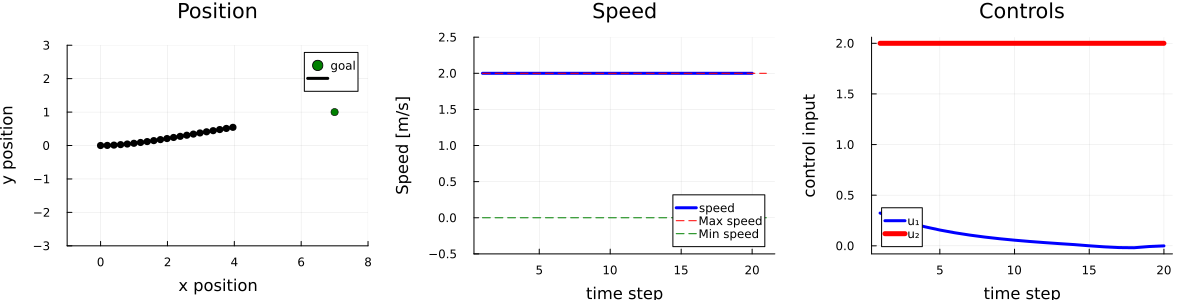

In [236]:
incon_problem, xs, us = @time solve(incon_problem, iterations=5, verbose=false, keep_history=false);
plot_solve_solution(incon_problem)

### Interaction planner

In [297]:
dt = 0.1
velocity_max = 2.0
# human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 2.])
human = Unicycle(dt, velocity_max, [1.0, 2.])

time_horizon = 50
# Q = zeros(Float64, human.state_dim, human.state_dim)
# R = diagm([0.; 0.1]) 
# Qt = diagm([10.; 10.])
Q = diagm([0.0; 0.0; 0.])
R = diagm([0.5; 0.1]) 
Qt = diagm([3.; 3.; 0.])
markup = 1.
collision_slack = 100.
trust_region_weight = 1.2
inconvenience_weights = [1.; 1.; 0.001]
collision_radius = 0.75
inconvenience_ratio = .1


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 2.0
robot = Unicycle(dt, velocity_max, [1.0, 2.])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.])
R = diagm([0.5; 0.1]) 
Qt = diagm([3.; 3.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)


PlannerHyperparameters{Float64}
  dynamics: Unicycle{Float64}
  time_horizon: Int64 50
  Q: Array{Float64}((3, 3)) [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [0.5 0.0; 0.0 0.1]
  Qt: Array{Float64}((3, 3)) [3.0 0.0 0.0; 0.0 3.0 0.0; 0.0 0.0 0.0]
  markup: Float64 1.0
  collision_slack: Float64 100.0
  trust_region_weight: Float64 1.2
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.001]
  collision_radius: Float64 0.75
  inconvenience_ratio: Float64 0.1


In [360]:
robot_initial_state = [0.; 0.; 0.]
human_initial_state = [7.; 0.; -pi]
human_goal_state = [-1.; 0.; -pi]
robot_goal_state = [7.; 0.; 0.]
solver = "ECOS"

ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [361]:
incon_problem, xs, us = @time solve(ip.ego_planner.incon, iterations=10, verbose=false, keep_history=false)
incon_problem, xs, us = @time solve(ip.other_planner.incon, iterations=10, verbose=false, keep_history=false);



  0.189115 seconds (599.03 k allocations: 59.740 MiB)


  0.227100 seconds (599.19 k allocations: 59.843 MiB, 10.12% gc time)


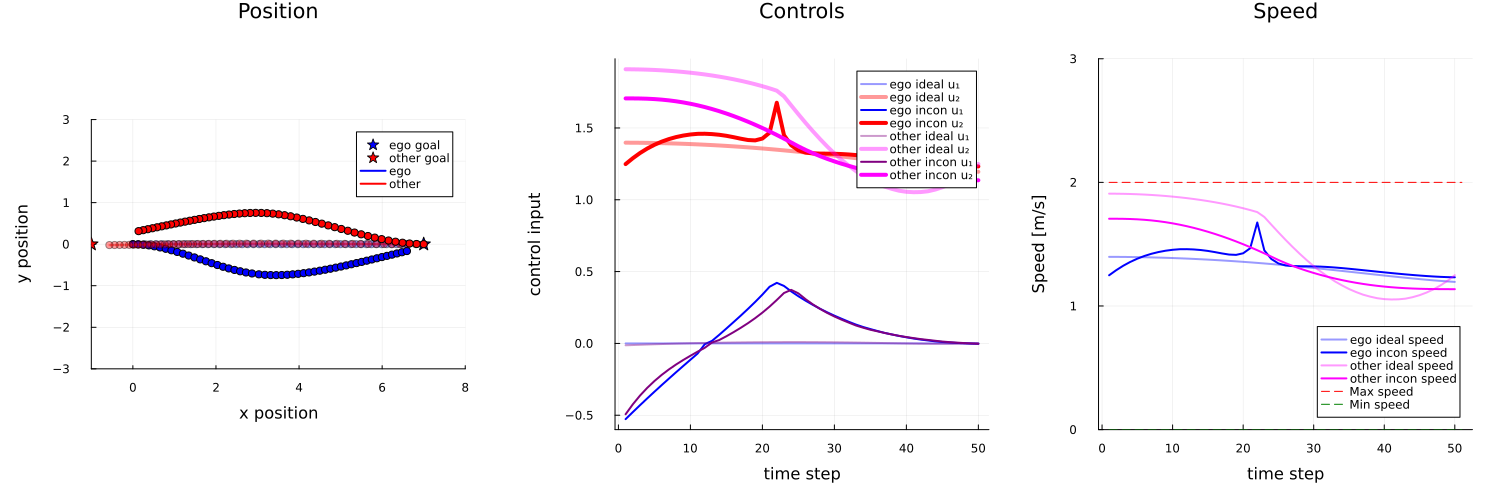

In [362]:
plot_solve_solution(ip)

# Iterated Best Response

In [363]:
@time IteratedBestResponse(ip, 3, "")

  0.543763 seconds (2.10 M allocations: 201.566 MiB, 4.32% gc time)


InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


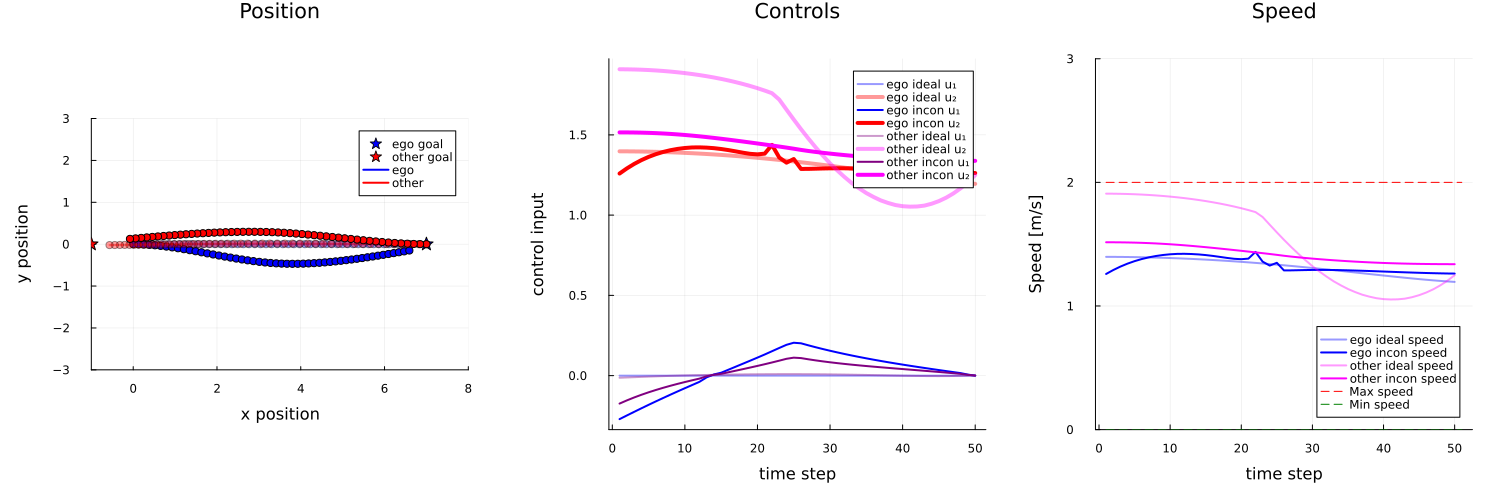

In [364]:
plot_solve_solution(ip)

# Animation

Int64

┌ Info: Saved animation to /home/trajopt/repos/ProactiveHRI.jl/animations/save_test.gif
└ @ Plots /home/trajopt/.julia/packages/Plots/rz1WP/src/animation.jl:156


┌ Info: Saved animation to /tmp/jl_0jK3ylghq1.gif
└ @ Plots /home/trajopt/.julia/packages/Plots/rz1WP/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_0jK3ylghq1.gif")
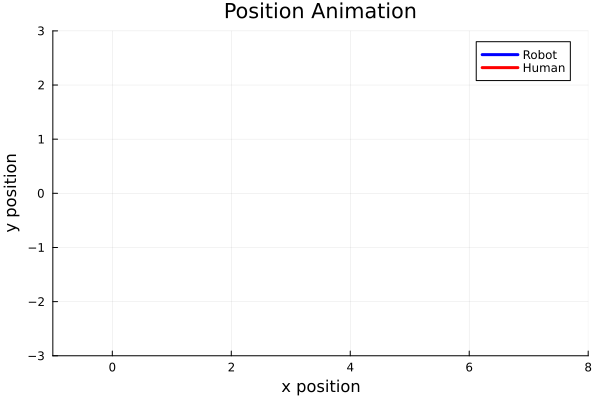

In [400]:
animation(ip, save_name="save_test")